In [4]:
%matplotlib inline
import nivapy3 as nivapy
import mvm_python
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('ggplot')

In [6]:
# Connect to NIVABASE
eng = nivapy.da.connect()

Connection successful.


# TOC Thematic Report - February 2019 (Part 1: Data clean-up)

This notebook describes cleaning and updating data for the ~260 "core" ICPW stations (as opposed to the broader network of 430 "trends" stations). 

Note that there is substantial overlap between the "core" and "trends" sites, but the data are stored separately in the database: the most recent data for the "trends" work is associated with a project named `'ICPW_TOCTRENDS_2018'` (project_id=4390), whereas the "core" stations are split according to country with projects named `'ICPWaters CA'`, `'ICPWaters NO'` etc. In theory, where a station is used in both the "core" and "trends" work, the associated chemistry data should be the same, but in practice this is not always be the case. Note also that, in 2015, Tore created a set of country-specific "TOC trends" projects, named e.g. `'ICPW_TOCTRENDS_2015_NO'`. These include yet more duplicated data, but they should now be considered deprecated as they have been superseded by `'ICPW_TOCTRENDS_2018'`.

The purpose of the work presented here is to (i) quality assess and upload the latest data for the "core" stations; (ii) review - and where necessary update - the sites used in each country (e.g. changes to monitoring mean that some locations are no longer suitable for ICPW); and (iii) to check that the "core" and "trends" datasets are broadly in agreement.

## 1. Update and restructure data from Focal Centres

### 1.1. Canada

There are 18 Canadian stations in the "core" ICPW programme and I have added the most recent templates to the database.

The code below applies a correction factor of 1.28 to the records for TOC in Nova Scotia collected before March 1995. See e-mail exchanges with Don, John and Heleen on 15/02/2019 for further details.

In [3]:
## Switch TOC/DOC pre-March 1995 to method with correction factor of 1.28
#with eng.begin() as conn: 
#    sql = ("UPDATE resa2.water_chemistry_values2 "
#           "SET method_id = 10823 "
#           "WHERE sample_id IN ( "
#           "  SELECT water_sample_id "
#           "  FROM resa2.water_samples "
#           "  WHERE station_id IN (23461, 23462, 23463, 23464, 23465) "
#           "  AND sample_date < DATE '1995-03-01') "
#           "AND method_id IN (10294, 10273)")
#    conn.execute(sql)

### 1.2. Finland

Jussi has supplied an entirely new dataset for all Finnish stations covering the period from 1990 to 2017. This supersedes the data already in the database. I have therefore removed all post-1990 data for both "core" and "TOC_TRENDS_2015" stations, and replaced the values with the most recent dataset. I have also updated the station properties (NFC codes etc.) based on the latest information provided.

One of the "core" Finnish stations, FI13, is no longer monitored. Jussi has proposed that this station be removed from the "core" and replaced with Nat_FI_27. This is a nearby station with similar characteristics and ongoing monitoring. It is also one of the "trends" stations, with code `'Nat_FI_27'` in the 2015 trends dataset and code `'Tr18_FI_39478'` in the latest trends work. 

Based on this, I have removed FI13 from the "core" and substituted Nat_FI_27 instead.

### 1.3. Czech Republic

The Czech data was reviewed and updated during 2016. The latest data provided during 2017 has now also been added.

### 1.4. Germany

It looks as though there has been a long-running confusion regarding site names and codes for the German stations. As far as I can make out, the following changes are required:

 * Station DE34, which is currently named "Odenwald, Schmerbach 1" in our database, should actually be named "Odenwald, Rombach 4"
 
 * Station DE35, which is currently named "Taunus, Rombach 4" in our database, should actually be labelled "DE36" and named "Odenwald, Schmerbach 1"
 
 * Station DE11, which is currently named "Schwarzwald, Kleine Kinzig" in our database, should actually be labelled "DE35" and named "Schwarzwald, Kleine Kinzig Huettenhardt"
 
I have made these changes, as well as updating the station properties with the NFC codes provided by Jens. Hopefully this will help to avoid confusion in the future.

**Note:** Changing site names/codes like this is quite dangerous, as there is a good chance of data becoming associated with the wrong station. It might be worth getting Jens to check the data we have after this clean-up, or perhaps submitting an entirely new dataset if that's not too much work.

Other points to note:

 * Monitoring has stopped at several of the German stations, and we also seem to have a gap in data submission between 2013 and 2016 (giving an actual data gap from the end of 2012 to the end of 2014)
 
 * For the lakes, Jens has provided data from a wide variety of depths. We are primarily interested in surface samples, but restricting the data to just depth = 0 results in a very limited dataset. As with some other countries, I have therefore filtered the data to include samples (including "mixed samples") from less than or equal to 2 m depth.
 
### 1.5. Latvia

Data tidied by Cathrine - see e-mail received 18.02.2019.

### 1.6. Moldova

Data tidied by Cathrine - see e-mail received 18.02.2019. I have created two new stations (MD01 and MD02) and associated them with a new project (`'ICPWaters MD'`).

### 1.7. Estonia

Data tidied by Espen - see e-mail received 18.02.2019.

### 1.8. Italy

Data tidied by Espen - see e-mail received 18.02.2019. I have created 6 new stations (IT07 to IT12) and added them to the existing `'ICPWaters IT'` project.

### 1.9. Switzerland

Data tidied by Espen - see e-mail received 18.02.2019.

### 1.10. Sweden

The latest Swedish data are available from the MVM database. For consistency, it seems sensible to update the entire data series using the API, thereby ensuring that NIVA has the most recent quality assured data. The file

    .\ICP_Waters\Call_For_data_2018\replies\sweden\sweden_core_stations_mvm_codes_feb_2019.xlsx
    
lists the 22 Swedish stations in the "core" programme. I have deleted all the data associated with these stations. The code below then uses my [MVM_Python package](https://github.com/NIVANorge/mvm_python) to download updated series from the Swedish database and add them to RESA.

In [3]:
# Get a list of the Swedish sites
stn_xlsx = (r'../../../Call_For_data_2018/replies'
            r'/sweden/sweden_core_stations_mvm_codes_feb_2019.xlsx')
swe_df = pd.read_excel(stn_xlsx)
print (len(swe_df))
swe_df.head()

22


,station_id,station_code,station_name,nfc_code
0,23597,SE01,Delångersån Iggersund,18985
1,23598,SE02,Alsterån Getebro,44
2,23600,SE05,Tväringen,126
3,23601,SE06,Stensjön,132
4,23602,SE08,Brunnsjön,98


In [4]:
# Lookup table matching MVM pars to RESA methods
par_map_xlsx = (r'../../../Sweden_MVM_API/map_mvm_pars_to_resa2.xlsx')
par_map_df = pd.read_excel(par_map_xlsx)
par_map_df

,mvm_par,factor,icpw_par,icpw_method_id
0,Alk/Acid,1.00,ALKGMILLI,10297
1,SO4_IC,1.00,SO4_IC mekv/l,10555
2,NO2+NO3-N,1.00,NO3N,10265
3,Cl,1.00,Cl,10556
4,TOC,1.00,TOC,10273
5,KMnO4,0.25,Perm,10267
6,pH,1.00,pH,10268
7,Ca,1.00,Ca mekv/l,10551
8,Mg,1.00,Mg mekv/l,10552
9,Na,1.00,Na mekv/l,10553


In [5]:
def f(row):
    """ Function to deal with flags.
    """
    if '<' in row['value_']:
        val = '<'
    elif '>' in row['value_']:
        val = '>'
    else:
        val = np.nan
    return val

In [ ]:
# # Path to local file containing MVM access tokens
# token_xlsx = r'../../../Sweden_MVM_API/md_mvm_tokens.xlsx'

# # Time period of interest
# st_yr = 1970
# end_yr = 2016

# # Loop over stations
# for idx, row in list(swe_df.iterrows()):
#     # Get IDs
#     resa_id = row['station_id']
#     mvm_id = row['nfc_code']
#     name = row['station_name']
#     print('Processing: %s' % name)
#     print ('    Getting data from MVM...')
    
#     # Get data from MVM
#     mvm_df = mvm_python.query_mvm_station_data(mvm_id, 
#                                                st_yr, 
#                                                end_yr, 
#                                                token_xlsx)
    
#     print ('    Restructuring...')
    
#     # Get pars of interest    
#     mvm_df = pd.merge(mvm_df, par_map_df, 
#                       how='inner',
#                       left_on='par_name', 
#                       right_on='mvm_par')
    
#     # Convert units
#     mvm_df['value'] = mvm_df['value'] * mvm_df['factor']
    
#     # If multiple depths are available, get the shallowest
#     mvm_df.sort_values(by=['depth1', 'depth2'], inplace=True)
#     mvm_df.drop_duplicates(subset=['mvm_id', 'sample_date', 'par_name'], 
#                            inplace=True)
    
#     # Get just cols of interest
#     mvm_df = mvm_df[['sample_date', 'icpw_method_id', 'value']]  
    
#     # Occasionally, there are still some duplicates (e.g. Tot-N_ps and Tot-N_TNb)
#     # at the same site-date. Average these for now
#     mvm_df = mvm_df.groupby(['sample_date', 
#                              'icpw_method_id']).agg({'value':'mean'}).reset_index()
    
#     # Sometimes values of 0 are reported. Drop these as dubious
#     mvm_df['value'].replace(0, np.nan, inplace=True)
#     mvm_df.dropna(subset=['value'], inplace=True)
    
#     # Make sure the df can be pivoted (integrity check - don't actually need 
#     # to pivot, so result is not saved as variable)
#     mvm_df.pivot(index='sample_date', columns='icpw_method_id')
    
#     # Build water samp df
#     ws_df = mvm_df[['sample_date']].copy()
#     ws_df['station_id'] = resa_id
#     ws_df['depth1'] = 0
#     ws_df['depth2'] = 0
#     ws_df.drop_duplicates(subset=['sample_date'], inplace=True)
#     ws_df.sort_values(by='sample_date', inplace=True)
#     ws_df = ws_df[['station_id', 'sample_date', 'depth1', 'depth2']]
    
#     # Add water samples to db
#     print ('    Writing data to WATER_SAMPLES table...')
    
#     dtypes = {c:types.VARCHAR(ws_df[c].str.len().max())
#               for c in ws_df.columns[ws_df.dtypes == 'object'].tolist()}

#     ws_df.to_sql(name='water_samples', 
#                  schema='resa2',
#                  con=eng, 
#                  if_exists='append', 
#                  index=False,
#                  dtype=dtypes)
    
#     # Get sample_ids back from db
#     print ('    Identifying sample IDs...')
    
#     sql = ('SELECT water_sample_id, station_id, sample_date '
#            'FROM resa2.water_samples '
#            'WHERE station_id = %s' % resa_id)
#     ws_df = pd.read_sql_query(sql, eng)

#     print ('    Checking data integrity...')
    
#     # Join sample id to chemistry
#     chem_df = pd.merge(mvm_df, ws_df, how='left', on='sample_date')
    
#     # Get cols of interest
#     chem_df = chem_df[['water_sample_id', 'icpw_method_id', 'value']]
#     chem_df.columns = ['sample_id', 'method_id', 'value_']
    
#     # Drop NaNs
#     chem_df.dropna(how='any', inplace=True)
    
#     # Deal with flags
#     chem_df['value_'] = chem_df['value_'].astype(str)
#     chem_df['flag1'] = chem_df.apply(f, axis=1)

#     # Extract numeric chars
#     chem_df['value'] = chem_df['value_'].str.extract("([-+]?\d*\.\d+|\d+)", expand=True)
#     chem_df['value'] = chem_df['value'].astype(float)
#     del chem_df['value_']
    
#     # Reorder cols
#     chem_df = chem_df[['sample_id', 'method_id', 'value', 'flag1']]

#     # Check flags are consistent
#     if not pd.isnull(chem_df['flag1']).all():
#         if not set(chem_df['flag1'].unique()).issubset(['<', '>', np.nan]):
#             print ('Some flags are not valid:')
#             print (chem_df['flag1'].unique())

#     # Add chem to db
#     print ('    Writing data to WATER_CHEMISTRY_VALUES2 table...')
    
#     dtypes = {c:types.VARCHAR(chem_df[c].str.len().max())
#               for c in chem_df.columns[chem_df.dtypes == 'object'].tolist()}

#     chem_df.to_sql(name='water_chemistry_values2', 
#                    schema='resa2',
#                    con=eng, 
#                    if_exists='append', 
#                    index=False,
#                    dtype=dtypes)
   
#     print ('    Done.')

### 1.11. USA

As described in the [trends notebook](https://nbviewer.jupyter.org/github/JamesSample/icpw/blob/master/toc_trends_oct_2018_part1.ipynb#3.8.-USA) John has supplied an entirely new set of data for the US, but some of the NFC codes have changed. I have therefore updated the codes in our database to reflect these changes. The latest station codes for the 95 "core" US sites are given in 

    .\ICP_Waters\Call_For_data_2018\usa_trends_and_core_sites.xlsx
    
Note that John's most recent dataset does not include any data for 4 of the "core" stations:

    US82, US94, US125 and X15:1C1-106
    
because these are no longer active.

I have deleted all the old data associated with the US sites, **except for the 4 stations listed above**. The code below reads John's new files and creates an Excel worksheet in the same format as the ICPW template, which can then be added back to the database.

In [6]:
# Get list of US "core" stations
stn_xlsx = r'../../../Call_For_data_2018/usa_trends_and_core_sites.xlsx'
stn_df = pd.read_excel(stn_xlsx, sheet_name='Stations')
us_cds = list(stn_df['nfc_code'].unique())

# Exclude inactive stations ['US82', 'US94', 'US125', 'X15:1C1-106']
inactive = ['ME-9998E', '1C1-092', '1C1-096', '1C1-106E']
us_cds = [i for i in us_cds if i not in inactive]
len(us_cds) # Should be 91

91

In [7]:
# Read stream data
riv_xl_path = r'../../../Call_for_Data_2018/replies/usa/Stoddard LTM streams_2018.xls'
riv_df = pd.read_excel(riv_xl_path, sheet_name='LTM stream data 1979-2016')

# Tidy
del riv_df['PROGRAM'], riv_df['YR']
del riv_df['ALDS'], riv_df['ALOR']
del riv_df['DIC'], riv_df['FLOW']

# Rename
riv_df.rename({'SITE_ID':'Code',
               'DATE_TIME':'Date',
               'ALTD':'TAL',
               'ANC':'ALKGMIKRO',
               'CA':'Ca',
               'CL':'Cl',
               'COND':'K25X',
               'DOC':'TOC',
               'MG':'Mg',
               'NA':'Na',
               'NH4':'NH4N',
               'NO3':'NO3N',
               'PH':'pH',
               'SIO2':'SiO2',
               'SO4':'SULF',
               'WTEMP':'TEMP'},
              inplace=True,
              axis=1)

# Convert units
riv_df['Ca'] = riv_df['Ca']*40.1/(1000*2)        # ueq/l to mg/l
riv_df['Cl'] = riv_df['Cl']*35.45/(1000*1)       # ueq/l to mg/l
riv_df['K'] = riv_df['K']*39.1/(1000*1)          # ueq/l to mg/l
riv_df['Mg'] = riv_df['Mg']*24.3/(1000*2)        # ueq/l to mg/l
riv_df['Na'] = riv_df['Na']*23./(1000*1)         # ueq/l to mg/l
riv_df['NH4N'] = riv_df['NH4N']*14.              # ueq/l to ugN/l
riv_df['NO3N'] = riv_df['NO3N']*14.              # ueq/l to ugN/l
riv_df['SULF'] = riv_df['SULF']*96.065/(1000*2)  # ueq/l to mgSO4/l

riv_df.head()

,Code,Date,TAL,ALKGMIKRO,Ca,Cl,K25X,TOC,K,Mg,Na,NH4N,NO3N,pH,SiO2,SULF,TEMP
0,01362285,1983-08-15,60.0,32.0,2.40199,0.740905,28.0,0.7,0.19941,0.829845,0.6003,NaN,429.8,6.50,2.5,7.075187,NaN
1,01362285,1983-11-01,10.0,26.0,2.20149,0.769265,27.0,1.8,0.30107,0.890595,0.7015,NaN,180.6,6.30,2.1,6.935893,NaN
2,01362285,1983-12-15,10.0,18.0,2.30174,0.779900,23.0,2.5,0.28152,0.760590,0.5014,NaN,309.4,6.24,1.9,5.994456,NaN
3,01362285,1984-02-02,30.0,20.0,2.30174,0.740905,22.5,2.2,0.23069,0.850500,0.6003,NaN,410.2,6.20,1.8,6.835025,NaN
4,01362285,1984-04-02,50.0,24.0,2.20149,0.769265,25.0,0.9,0.25024,0.810405,0.5014,NaN,270.2,6.35,1.6,6.354700,NaN


In [8]:
# Read lake data
la_xl_path = r'../../../Call_for_Data_2018/replies/usa/Stoddard LTM lakes_2018.xls'
la_df = pd.read_excel(la_xl_path, sheet_name='LTM lake data 1980-2016')

# Fill NaN in DEPTH column with 0
la_df['DEPTH'] = la_df['DEPTH'].fillna(0)

# Get surface only
la_df = la_df.query("DEPTH <= 1")

# Tidy
del la_df['PROGRAM'], la_df['SAMTYPE']
del la_df['year'], la_df['month'], la_df['day']
del la_df['ALDS'], la_df['ALOR'], la_df['CHLA']
del la_df['DIC'], la_df['PHEQ'], la_df['DEPTH']

# Rename
la_df.rename({'SITE_ID':'Code',
              'DATE_TIME':'Date',
              'AL':'TAL',
              'ANC':'ALKGMIKRO',
              'CA':'Ca',
              'CL':'Cl',
              'COLOR':'COLOUR',
              'COND':'K25X',
              'DOC':'TOC',
              'MG':'Mg',
              'NA':'Na',
              'NH4':'NH4N',
              'NO3':'NO3N',
              'PH':'pH',
              'PTL':'TOTP',
              'SIO2':'SiO2',
              'SO4':'SULF',
              'WTEMP':'TEMP'},
              inplace=True,
              axis=1)

# Convert units
la_df['Ca'] = la_df['Ca']*40.1/(1000*2)        # ueq/l to mg/l
la_df['Cl'] = la_df['Cl']*35.45/(1000*1)       # ueq/l to mg/l
la_df['K'] = la_df['K']*39.1/(1000*1)          # ueq/l to mg/l
la_df['Mg'] = la_df['Mg']*24.3/(1000*2)        # ueq/l to mg/l
la_df['Na'] = la_df['Na']*23./(1000*1)         # ueq/l to mg/l
la_df['NH4N'] = la_df['NH4N']*14.              # ueq/l to ugN/l
la_df['NO3N'] = la_df['NO3N']*14.              # ueq/l to ugN/l
la_df['SULF'] = la_df['SULF']*96.065/(1000*2)  # ueq/l to mgSO4/l

la_df.head()

,Code,Date,TAL,ALKGMIKRO,Ca,Cl,COLOUR,K25X,TOC,K,Mg,Na,NH4N,NO3N,pH,TOTP,SiO2,SULF,TEMP
0,020058O,1992-06-08,171.0,27.90,2.101040,0.449860,100.0,21.25,12.70,0.500480,0.498150,0.70035,2.38,16.24,5.574,NaN,1.81,4.235986,NaN
1,020058O,1992-07-06,172.0,42.30,1.941041,0.359818,90.0,20.61,12.78,0.450432,0.478224,0.67045,25.62,9.94,5.600,NaN,0.30,4.455975,NaN
2,020058O,1992-08-03,153.0,29.66,1.910966,0.347765,80.0,20.35,12.44,0.410550,0.438372,0.67045,20.16,10.78,5.731,NaN,0.19,4.066431,NaN
3,020058O,1992-09-01,188.0,38.52,1.500742,0.339966,70.0,20.45,11.88,0.350336,0.518076,0.73048,74.48,8.82,5.664,NaN,0.85,4.256160,NaN
4,020058O,1992-10-05,175.0,35.73,2.371113,0.659725,90.0,20.94,11.94,0.380443,0.498150,0.65044,-16.24,0.00,5.670,NaN,2.42,4.216293,NaN


In [9]:
# Combine river and lake data
us_df = pd.concat([riv_df, la_df], axis=0, sort=False)

# Filter to just sites in core project
us_df = us_df[us_df['Code'].isin(us_cds)]

# Join ICPW codes
us_df = pd.merge(us_df, stn_df[['station_code', 'nfc_code']], 
                 left_on='Code', right_on='nfc_code')

# Average duplicates
us_df = us_df.groupby(['station_code', 'Date']).mean()

# Tidy
us_df.reset_index(inplace=True)

# Check we have data for all sites
assert len(us_df['station_code'].unique()) == len(us_cds), 'Some stations have no data.' 

# Rename
us_df.rename({'station_code':'Code'},
             inplace=True,
             axis=1)

# Save to Excel
out_xl = r'../../../Call_for_Data_2018/replies/usa/usa_lake_stream_all_core_to_2016_tidied.xlsx'
us_df.to_excel(out_xl, sheet_name='Data', index=False)

us_df.head()

,Code,Date,TAL,ALKGMIKRO,Ca,Cl,K25X,TOC,K,Mg,Na,NH4N,NO3N,pH,SiO2,SULF,TEMP,COLOUR,TOTP
0,US05,1983-04-21,89.0,0.0,0.870371,2.97780,NaN,NaN,0.220133,0.369846,2.10105,NaN,0.0,NaN,NaN,3.842600,NaN,NaN,NaN
1,US05,1983-05-25,80.0,1.7,0.820446,2.80055,NaN,NaN,0.220133,0.339835,2.05114,NaN,0.0,NaN,NaN,3.842600,NaN,NaN,NaN
2,US05,1983-07-07,80.0,0.4,0.850521,3.04870,23.0,NaN,0.229908,0.339835,2.04102,NaN,0.0,NaN,NaN,3.746535,NaN,NaN,NaN
3,US05,1983-10-25,33.0,2.3,0.910470,2.83600,17.0,NaN,0.279956,0.369846,2.06103,NaN,0.0,NaN,NaN,3.938665,NaN,NaN,NaN
4,US05,1984-04-27,109.0,2.3,0.810421,2.87145,25.0,NaN,0.269790,0.329873,1.99111,NaN,0.0,NaN,3.21,4.034730,NaN,NaN,NaN


In [ ]:
# # Delete existing data for 91 stations

# # Get station IDs
# sql = ("SELECT station_id FROM resa2.stations "
#        "WHERE station_code IN %s" % str(tuple(list(us_df['Code'].unique()))))
# id_df = pd.read_sql(sql, eng)

# # Delete from SAMPLE_SELECTIONS
# print ('Deleting from SAMPLE_SELECTIONS')
# sql = ("DELETE FROM resa2.sample_selections "
#        "WHERE water_sample_id IN ( "
#        "  SELECT water_sample_id FROM resa2.water_samples "
#        "  WHERE station_id IN %s)" % str(tuple(list(id_df['station_id'].unique()))))
# eng.execute(sql)

# # Delete from WCV2
# print ('Deleting from WATER_CHEMISTRY_VALUES2')
# sql = ("DELETE FROM resa2.water_chemistry_values2 "
#        "WHERE sample_id IN ( "
#        "  SELECT water_sample_id FROM resa2.water_samples "
#        "  WHERE station_id IN %s)" % str(tuple(list(id_df['station_id'].unique()))))
# eng.execute(sql)

# # Delete from WATER_SAMPLES
# print ('Deleting from WATER_SAMPLES')
# sql = ("DELETE FROM resa2.water_samples "
#        "WHERE station_id IN %s" % str(tuple(list(id_df['station_id'].unique()))))
# eng.execute(sql)

### 1.12. UK

There are 6 UK stations within the "core" programme. As [described in the "trends" notebook](https://nbviewer.jupyter.org/github/JamesSample/icpw/blob/master/toc_trends_oct_2018_part1.ipynb#3.7.-UK), some issues have been identified with the historic data already in the database. I will therefore delete all the old data and upload corrected values compatible with the most recent trends work. For the UK, the "core" stations are a subset of the "trends" stations, so it's just a question of uploading a cut-down version of the cleaned "trends" dataset. I have created a new Excel file for just the "core" stations here

    .\ICP_Waters\Call_For_data_2018\replies\uk\icpw_uk_core_all.xlsx
    
This has been uploaded to the database.

In [ ]:
# # Delete existing data for 6 UK stations

# # Delete from SAMPLE_SELECTIONS
# print ('Deleting from SAMPLE_SELECTIONS')
# sql = ("DELETE FROM resa2.sample_selections "
#        "WHERE water_sample_id IN ( "
#        "  SELECT water_sample_id FROM resa2.water_samples "
#        "  WHERE station_id IN (23608, 23609, 23610, 23611, 23612, 36165))")
# eng.execute(sql)

# # Delete from WCV2
# print ('Deleting from WATER_CHEMISTRY_VALUES2')
# sql = ("DELETE FROM resa2.water_chemistry_values2 "
#        "WHERE sample_id IN ( "
#        "  SELECT water_sample_id FROM resa2.water_samples "
#        "  WHERE station_id IN (23608, 23609, 23610, 23611, 23612, 36165))")
# eng.execute(sql)

# # Delete from WATER_SAMPLES
# print ('Deleting from WATER_SAMPLES')
# sql = ("DELETE FROM resa2.water_samples "
#        "WHERE station_id IN (23608, 23609, 23610, 23611, 23612, 36165)")
# eng.execute(sql)

### 1.13. Ireland

The existing "core" project includes 10 stations in Ireland, but 7 of these (all the river sites) are no longer monitored. Julian has proposed a further 11 lake sites as replacements, which gives 21 Irish sites in total, but only 14 of them with active monitoring.

All the station locations and metadata for the Irish sites are given in 

    .\ICP_Waters\Call_for_Data_2017\Replies\ireland\ireland_20170929.xlsx
    
Note that for many of the sites there are several possible monitoring points (e.g. on the lake shore or out in open water), but all of them are given the same geographic co-ordinates in Julian's spreadsheet (i.e. a "station" comprises several nearby monitoring "points"). For ICPW, we have historically focused on the open water sites, so I have filtered the shoreline samples out from Julian's dataset. In some cases, there are several open water sampling points per station as well. This leads to duplicates, because the same site has been monitoried more than once on the same date, but at different points. These duplicated values are usually very similar, and differences will therefore be ignored.

I have created 11 new sites in the database based on the details in the Excel file above. This Excel file below contains the aggregated data supplied by Julian for the period from 2007 to 2017

    .\ICP_Waters\Call_For_data_2018\replies\ireland\ireland_icpw_2007-2017_jes_tidied.xls
    
**Note:** While adding the data to the database, I have noticed that historic values (i.e. those already in the database) for alkalinity look very high. From a brief check, I suspect many values are a factor of 1000 too large. This will need investigating further before undertaking the trends analysis - see section 2.6, below.

### 1.14. Poland

There are currently four Polish stations within the "core" programme (PL01 to PL04), but these have not been monitored since 2012 (see e-mail from Rafal received 17.06.2017 at 17.43). Instead, he has suggested 5 new stations and supplied data for these from 1999 to 2017. Details for the new sites are given in

    .\ICP_Waters\Call_for_Data_2016\Replies\poland\poland.xlsx
    
I have therefore created new stations with codes PL05 to PL09, together with a tidied data sheet here

    .\ICP_Waters\Call_For_data_2018\replies\poland\icpw_poland_post-2012_jes_tidied.xls
    
which has been added to the database.

## 2. Quality checking

There are clearly some issues with the raw data in the database. Before going further with the trends analysis, I'd like to try to catch as many of the data errors as possible. For now, I'll focus on the main parameters of interest for the trends report: SO4, base cations (Ca and Mg), NO3, Alkalinity, ANC (calculated from Ca, Mg, K, Na, NH4, Cl, SO4 and NO3), DOC/TOC and pH. 

### 2.1. Select projects

In [10]:
# Select projects
prj_grid = nivapy.da.select_resa_projects(eng)
prj_grid

582 projects in the RESA database.


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
# Select all relevant projects
prj_df = prj_grid.get_selected_df()
print (len(prj_df), 'projects selected.')
prj_df

15 projects selected.


,project_id,project_number,project_name,contact_person,project_description
383,1679,None,ICPWaters US,None,None
424,2120,None,ICPWaters NO,None,None
425,2140,None,ICPWaters CA,None,None
467,2923,None,ICPWaters UK,None,None
468,2943,None,ICPWaters FI,None,None
469,2944,None,ICPWaters SE,None,None
474,2986,None,ICPWaters CZ,None,None
475,2987,None,ICPWaters IT,None,None
476,2988,None,ICPWaters PL,None,None
477,2989,None,ICPWaters CH,None,None


**Note:** There are a total of 25 countries that have submitted data to ICPW in the past, but only the 15 above are suitable for the trends analysis. For reference, the others are:

|   Country   |                                                Comment                                               |
|:-----------:|:----------------------------------------------------------------------------------------------------:|
|   Armenia   |        Data only from 2004 - 2008. Does not use template. No response to recent calls for data       |
|   Austria   |                                  Only 1 station. No data since 2012                                  |
|   Belarus   |                         Only 1 station. No response to recent calls for data                         |
|    France   |                          No longer involved in project. Never supplied data?                         |
|   Hungary   |                          No longer involved in project. Never supplied data?                         |
|  Montenegro |        Data only from 2006 - 2009. Does not use template. No response to recent calls for data       |
| Netherlands |                                 Currently being processed by Cathrine                                |
|    Russia   |        Data only from 2009 - 2014. Does not use template. No response to recent calls for data       |
|   Slovakia  | Supplied as part of "trends" work. Could also be used in "core", but some overlap with Polish sites? |
|    Spain    |                        No data supplied. No response to recent calls for data                        |

Of these, it should eventually be possible to include data from the Netherlands, and maybe Slovakia too.

### 2.2. Select stations

In [12]:
# Get stations for these projects
stn_df = nivapy.da.select_resa_project_stations(prj_df, eng)
print (len(stn_df), 'stations associated with the selected projects.')
stn_df.head()

261 stations associated with the selected projects.


,station_id,station_code,station_name,latitude,longitude,altitude
0,221,BIE01,Birkenes,58.385426,8.241721,190.0
1,12080,STE01,Storgama v. dam,59.052333,8.653606,587.0
2,23505,DE01,"Schwarzwald, Dürreychbach",48.750167,8.443167,730.0
3,23506,DE02,"Fichtelgebirge, Eger",50.085000,11.824500,664.0
4,23507,DE03,"Rothaargebirge, Elberndorfer Bach",50.987833,8.201333,540.0


In [13]:
# Map
nivapy.spatial.quickmap(stn_df, 
                        popup='station_code',
                        aerial_imagery=True)

### 2.3. Select parameters

In [14]:
# Get available parameters
st_dt = '1970-01-01'
end_dt = '2019-01-01'
par_grid = nivapy.da.select_resa_station_parameters(stn_df,
                                                    st_dt,
                                                    end_dt,
                                                    eng)
par_grid

110 parameters available for the selected stations and dates.


QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [15]:
# Select relevant parameters
par_df = par_grid.get_selected_df()
par_df

,parameter_id,parameter_name,unit
0,3,ALK,mmol/l
1,65,ALK-E,µEq/l
13,11,Ca,mg/l
51,13,Mg,mg/l
56,5,NO3-N,µg/l N
39,12,K,mg/l
57,14,Na,mg/l
55,49,NH4-N,µg/l N
17,7,Cl,mg/l
77,8,SO4,mg/l


### 2.4. Select chemistry data

In [16]:
# Get chem
wc_df, dup_df = nivapy.da.select_resa_water_chemistry(stn_df,
                                                      par_df,
                                                      st_dt,
                                                      end_dt,
                                                      eng,
                                                      drop_dups=True,
                                                      lod_flags=False)
wc_df.head()

WARNING
The database contains unexpected duplicate values for some station-date-parameter combinations.
Only the most recent values will be used, but you should check the repeated values are not errors.
The duplicated entries are returned in a separate dataframe.



,station_id,station_code,station_name,sample_date,depth1,depth2,ALK-E_µEq/l,ALK_mmol/l,Ca_mg/l,Cl_mg/l,K_mg/l,Mg_mg/l,NH4-N_µg/l N,NO3-N_µg/l N,Na_mg/l,SO4_mg/l,TOC_mg C/l,pH_
,,,,,,,,,,,,,,,,,,
0,108,LAE01,"Langtjern, utlÃ¸p",1972-09-01 00:00:00,0.0,0.0,NaN,0.0,1.30,NaN,NaN,NaN,NaN,10.0,0.60,NaN,NaN,5.04
1,108,LAE01,"Langtjern, utlÃ¸p",1972-12-11 00:00:00,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,4.92
2,108,LAE01,"Langtjern, utlÃ¸p",1973-04-04 15:15:00,0.0,0.0,NaN,0.0,1.31,NaN,0.13,0.27,NaN,40.0,0.67,NaN,NaN,4.80
3,108,LAE01,"Langtjern, utlÃ¸p",1973-04-05 17:40:00,0.0,0.0,NaN,0.0,1.32,NaN,0.15,0.27,NaN,40.0,0.69,NaN,NaN,4.69
4,108,LAE01,"Langtjern, utlÃ¸p",1973-04-06 12:00:00,0.0,0.0,NaN,0.0,1.31,NaN,0.12,0.27,NaN,30.0,0.67,NaN,NaN,4.67


In [17]:
# Save for speed
wc_df.to_csv('working_chem.csv', index=False, encoding='utf-8')

In [18]:
# Load saved data
wc_df = pd.read_csv('working_chem.csv', encoding='utf-8')
wc_df['sample_date'] = pd.to_datetime(wc_df['sample_date'])

### 2.5. Basic quality checking

#### 2.5.1. Duplicates

The code above produces a warning about duplicated values, which should be investigated.

In [19]:
# Which stations have duplicates?
dup_df['station_code'].unique()

array(['LAE01', 'BIE01', 'STE01', 'KAE01', 'DALELV', 'CA10', 'CA11',
       'CA12', 'CA13', 'CA14', 'CA16', 'CA17', 'CA20', 'DE02', 'DE03',
       'DE04', 'DE07', 'DE08', 'DE09', 'DE13', 'DE14', 'DE16', 'DE18',
       'DE19', 'DE20', 'DE21', 'DE25', 'DE28', 'DE29', 'DE30', 'DE31',
       'DE32', 'DE33', 'DE34', 'DE36', 'EE01', 'LV03', 'LV04', 'LV05',
       'LV07', 'LV08'], dtype=object)

There are duplicated values for stations in Norway, Canada, Germany, Estonia and Latvia. The duplicates in Norway are due to the way the NIVA lab handles reanalyses, and my code is designed to query these correctly. For the other countries, the problem is due to submitting both DOC and TOC data for the same water sample. These are added to our database under separate methods, but for ICPW both TOC and DOC get mapped to TOC in the output, because ICPW does not distinguish between the two. My code will currently pick one of the duplicates at random, which is not ideal. However, as long as the ICPW assumption that TOC ~ DOC is correct, this shouldn't actually cause problems. (And if this assumption is not correct, we have broader issues to deal with in the ICPW database).

#### 2.5.2. Number of stations with data

From above, there are 261 stations associated with the selected projects. Do they all have at least some relevant data?

In [20]:
print(len(wc_df['station_id'].unique()), 'stations with data.')

260 stations with data.


In [21]:
# Identify missing station
set(stn_df['station_id']) - set(wc_df['station_id'])

{38562}

In [22]:
stn_df.query('station_id == 38562')

,station_id,station_code,station_name,latitude,longitude,altitude
251,38562,IE20,"Clare, Naminna, Mid Lake",52.78408,-9.22064,NaN


So, the only station with no data is IE20 - one of the new Irish lakes. I have checked Julian's original data submission and this looks OK: the only data he supplied for IE20 is from the shoreline, and these samples have been deliberately excluded - see section 1.13, above.

#### 2.5.3. Distribution of data through time

The code below calculates the number of water samples per year per station. A bar plot is produced for each country, where the height of each bar shows the average number of samples per year and the error bars show the minimum and maximum. For example, in Norway during 1973, the minimum number of samples was 146 (at Langtjern) and the maximum number was 368 (at Birkenes). 

In [23]:
# Get countries from proj names
sql = ("SELECT station_id, "
       "  SUBSTR(b.project_name, -2, 2) AS country "
       "FROM resa2.projects_stations a "
       "LEFT JOIN resa2.projects b "
       "ON a.project_id = b.project_id "
       "WHERE station_id IN %s "
       "AND SUBSTR(b.project_name, 1, 9) = 'ICPWaters'"% str(tuple(list(stn_df['station_id']))))
cnt_df = pd.read_sql(sql, eng)

# Join to chem
wc_df = pd.merge(wc_df, cnt_df, on='station_id')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


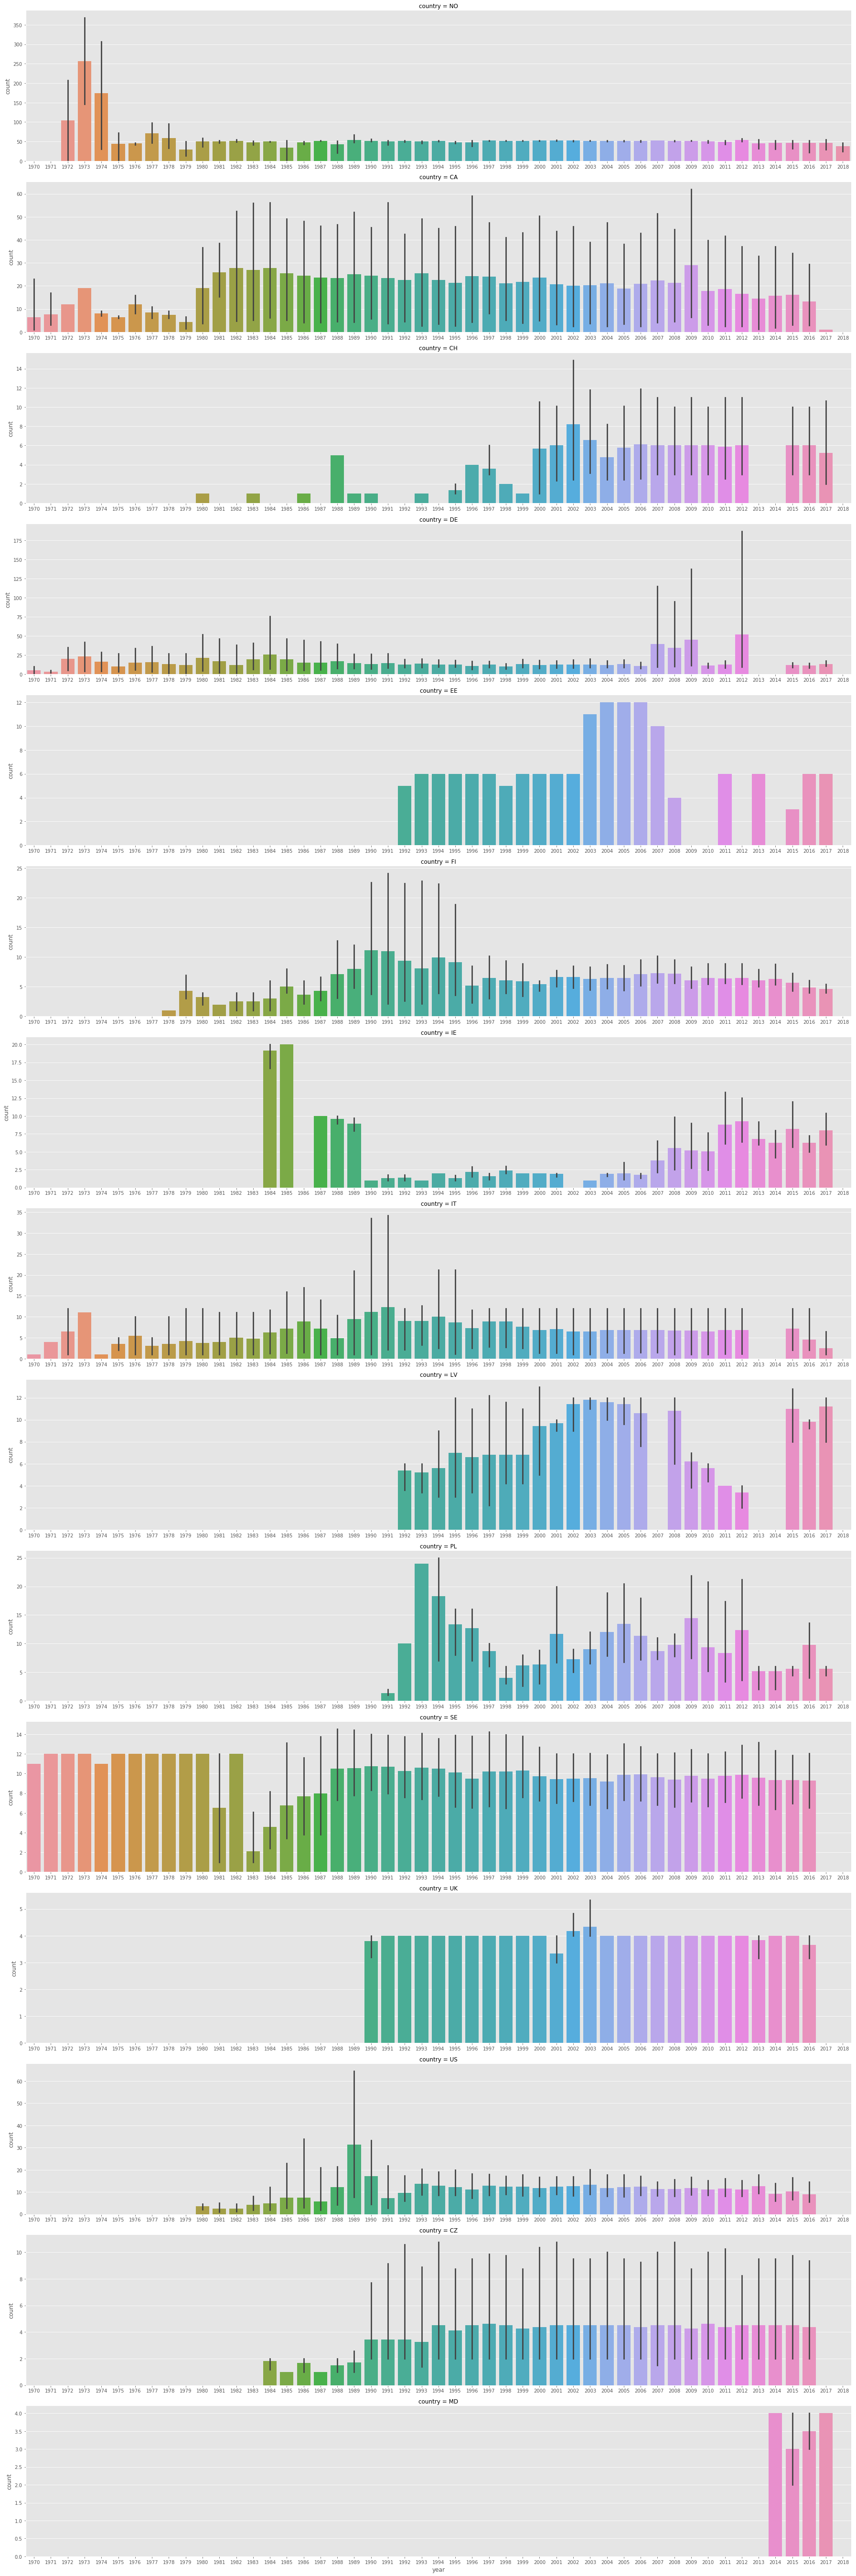

In [24]:
# Extract year
wc_df['year'] = wc_df['sample_date'].dt.year

# Number of samples per year per site
agg = wc_df.groupby(['station_id', 'country', 'year']).agg({'station_code':'count'}).reset_index()
agg.columns = ['station_id', 'country', 'year', 'count']

# Plot
g = sn.catplot(data=agg, 
               x='year', 
               y='count', 
               row='country', 
               kind='bar',
               ci=100,
               sharey=False,
               aspect=5)

for ax in g.axes:
    ax[0].xaxis.set_tick_params(which='both', labelbottom=True)    
plt.tight_layout()

The plots above illustrate the wide variability in monitoring across the ICPW programme. Some points to note:

 * The Norwegian sites have been monitored very consistently since the the 1980s (about 1 sample per week), as have *some* of the Canadian sites. It may be possible to try more sophisticated/detailed trend analyses using these high-frequency data
 
 * Germany, Poland, Sweden and the USA (plus some Canadian sites) typically have monthly monitoring i.e. still quite detailed
 
 * Switzerland, Estonia, Finland, Ireland, Italy, Latvia, the UK and the Czech Republic typically have fewer than 12 samples per year. This data is less detailed, and probably only suitable for calculating annual averages (rather than attempting to capture e.g. seasonal effects)
 
 * The dataset for Moldova currently only covers the period from 2014 to 2017. It is therefore not yet suitable for estimating trends

### 2.6. Parameter distributions

The code below produces boxplots for each parameter, split by country.

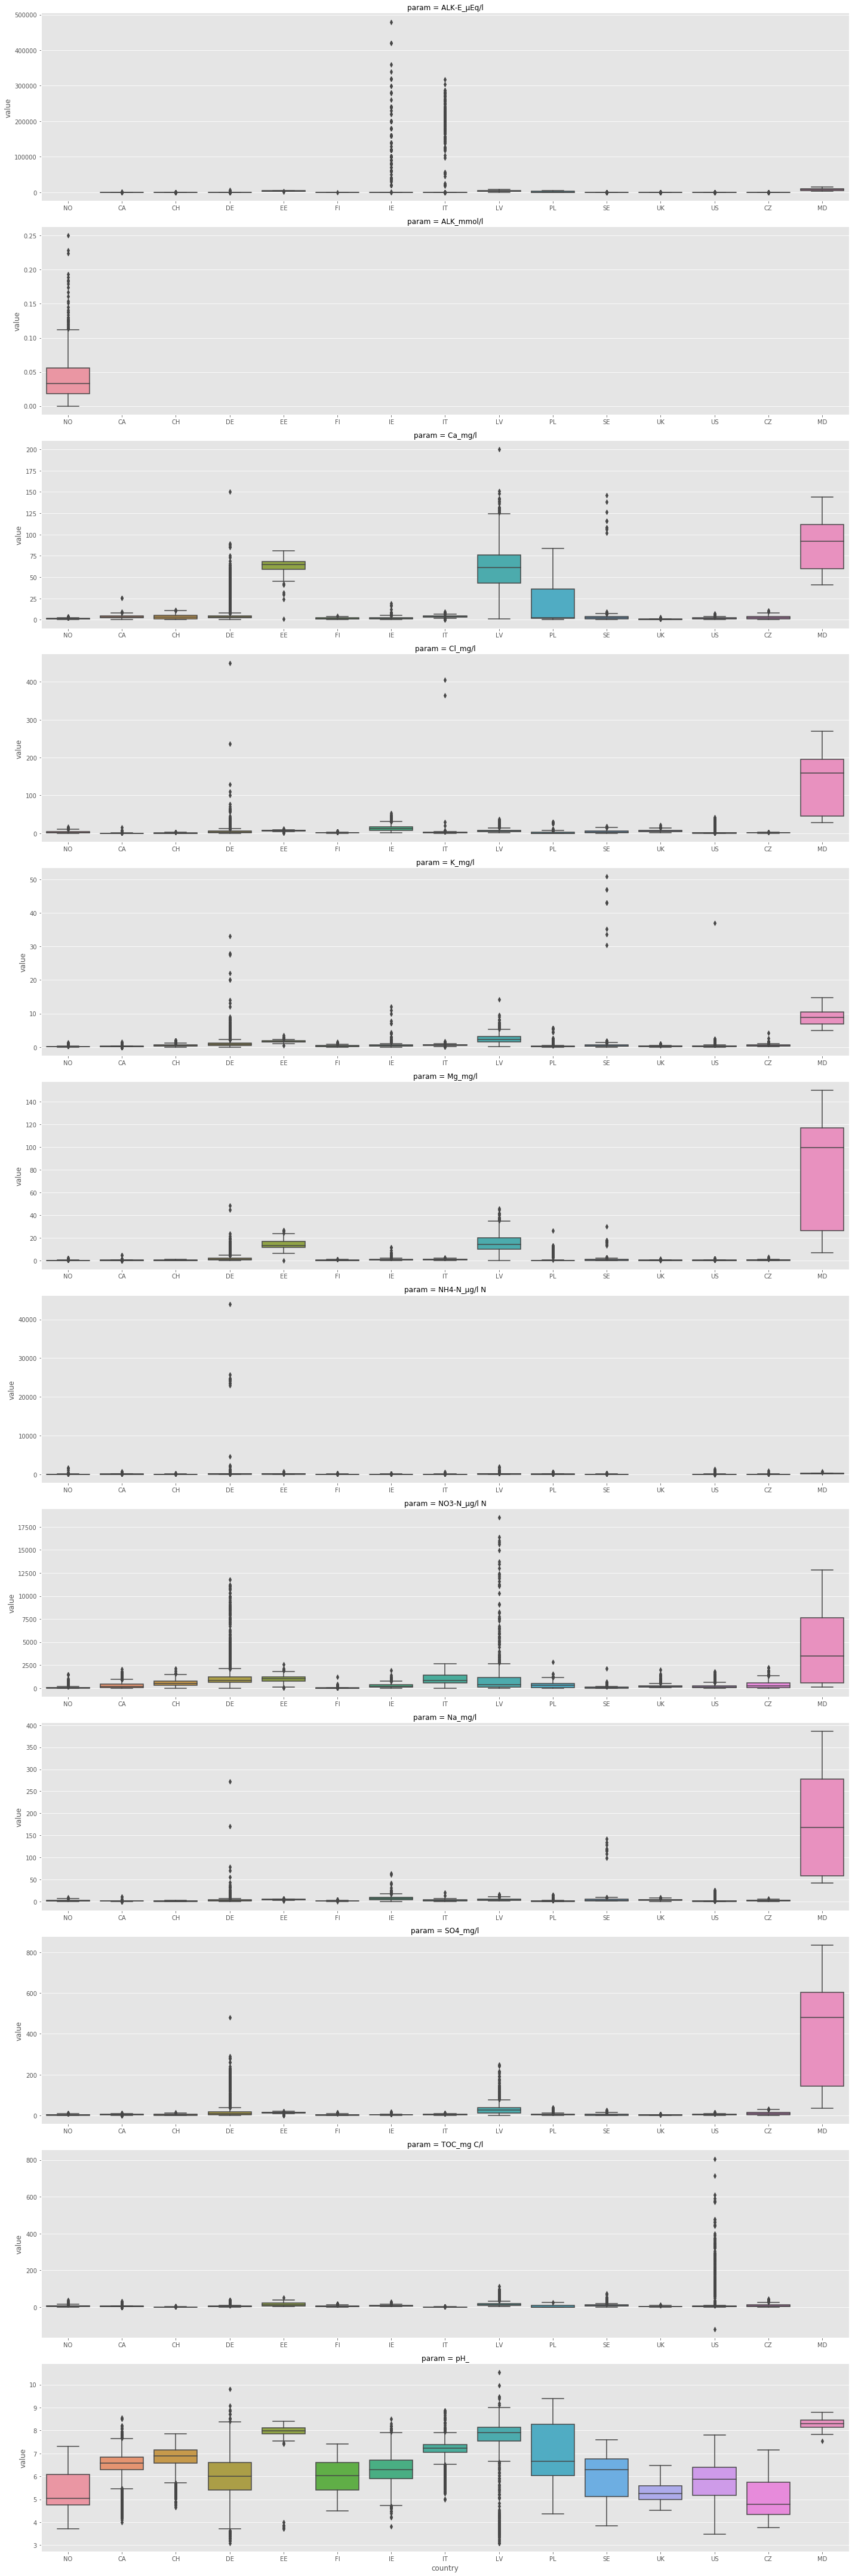

In [25]:
# Melt to long format
wc_lng = wc_df.melt(id_vars=['station_id', 'station_code', 
                             'station_name', 'country', 
                             'sample_date', 'year', 
                             'depth1', 'depth2'],
                    var_name='param')

# Plot
g = sn.catplot(data=wc_lng,
               x='country',
               y='value',
               row='param',
               kind='box',
               aspect=4,
               sharey=False)

for ax in g.axes:
    ax[0].xaxis.set_tick_params(which='both', labelbottom=True)    
plt.tight_layout()

Note the following:

 * There are clearly issues with the alkalinity data for the Irish and Italian stations. As mentioned in Section 1, I suspect there may be unit errors in some of the old templates (the recent ones look OK), which have resulted in values being uploaded that are a factor of 1000 too large. **Needs further investigation**
 
 * Alkalinity for the Norwegian sites (from NIVA's lab) is reported in mmol/l. These values need converting to ueq/l in order to be compatible with data from the Focal Centres
 
 * The data from Moldova is very different to that from the other ICPW sites. I don't know much about Moldova, but I guess the values are plausible if the regional is strongly influenced by marine processes and/or limestone geology? These sites don't have enough data for inclusion in the trends work, but **check the values look reasonable with Øyvind** nevertheless
 
 * There are a few very high Cl concentrations in a few of the German and Italian samples. Are these values plausible, or likely contaminated?
 
 * There are very high ammonium concentrations at some of the German sites, and very high nitrate concentrations in both Germany and Latvia. The nitrate values are plausible for heavily impacted (e.g. agricultural) systems, but they look a bit out of place within ICPW. Are these values reasonable? Some of the samples have NO3-N concentrations well above the drinking water limit specified by the Nitrates Directive (11.3 mg-N/l), which seems pretty high for supposedly "pristine" catchments
 
 * There are clearly issues with the TOC values from some of the US stations. This problem was previously identified during data preparation for the "TOC trends" paper and John is following it up (see e-mail from John received 15.02.2019 at 21.54 for details)
 
 * Some pH values from Latvia and Germany are very low. Did acidification really cause pH values as low as 3?
 
#### 2.6.1. Correct alkalinity

##### Ireland

Checking of the Irish data shows that, in the past, alkalinity has been supplied both as meq/l and as ueq/l. It seems pretty obvious that errors have been made regarding the units in some cases, such that values in ueq/l have been reported as meq/l, which results in an incorrect multiplier of 1000 being applied. Looking at the distribution of alkalinity values for the Irish sites, the following SQL can be used to identify and fix the problem (by switching the method from meq/l to ueq/l).

    UPDATE RESA2.WATER_CHEMISTRY_VALUES2
    SET method_id    = 10298
    WHERE sample_id IN
      (SELECT water_sample_id
      FROM RESA2.WATER_SAMPLES
      WHERE station_id IN
        ( SELECT station_id FROM RESA2.PROJECTS_STATIONS WHERE project_id = 3445
        )
      )
    AND method_id = 10297
    AND value     > 2;
    
##### Italy

Similarly, during 2010 to 2012, it looks as though alkalinity values in ueq/l for sites IT01 to IT06 have been mistakenly entered into the database as meq/l. This has been fixed using the following SQL

    UPDATE RESA2.WATER_CHEMISTRY_VALUES2
    SET method_id    = 10298
    WHERE sample_id IN
      (SELECT water_sample_id
      FROM RESA2.WATER_SAMPLES
      WHERE station_id IN
        ( SELECT station_id FROM RESA2.PROJECTS_STATIONS WHERE project_id = 2987
        )
      )
    AND method_id = 10297
    AND value     > 10;
    
#### 2.6.2. Correct Catskills TOC and Al

In [7]:
## Apply factor of 1/83.26 to DOC
#with eng.begin() as conn: 
#    sql = ("UPDATE resa2.water_chemistry_values2 "
#           "SET value = value/83.26 "
#           "WHERE sample_id IN ( "
#           "  SELECT water_sample_id "
#           "  FROM resa2.water_samples "
#           "  WHERE station_id IN (23658, 23659, 23660, 23661) "
#           "  AND sample_date > DATE '2014-10-01') "
#           "AND method_id = 10273")
#    conn.execute(sql)

In [8]:
## Apply factor of 26.98 to Al
#with eng.begin() as conn: 
#    sql = ("UPDATE resa2.water_chemistry_values2 "
#           "SET value = value*26.98 "
#           "WHERE sample_id IN ( "
#           "  SELECT water_sample_id "
#           "  FROM resa2.water_samples "
#           "  WHERE station_id IN (23658, 23659, 23660, 23661) "
#           "  AND sample_date > DATE '2014-10-01') "
#           "AND method_id = 10249")
#    conn.execute(sql)